<h2>Import Libary</h2>

In [447]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<h2>Read Data Source from Kaggle on </h2><a href="https://www.kaggle.com/ebrahimhaquebhatti/pakistan-house-price-prediction">Dataset House Prediction</a>

In [448]:
data = pd.read_csv('datasets/pakistan_house.csv')
data.head()


,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [449]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     168446 non-null  int64  
 1   property_id    168446 non-null  int64  
 2   location_id    168446 non-null  int64  
 3   page_url       168446 non-null  object 
 4   property_type  168446 non-null  object 
 5   price          168446 non-null  int64  
 6   location       168446 non-null  object 
 7   city           168446 non-null  object 
 8   province_name  168446 non-null  object 
 9   latitude       168446 non-null  float64
 10  longitude      168446 non-null  float64
 11  baths          168446 non-null  int64  
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Total_Area     168446 non-nul

In [450]:
data.isnull().sum()

Unnamed: 0           0
property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64

In [451]:
data = data.drop(['Unnamed: 0', 'property_id', 'location','location_id','page_url', 'date_added', 'latitude', 'longitude', 'agency', 'agent'], axis=1)
data.head()

,property_type,price,city,province_name,baths,purpose,bedrooms,Total_Area
0,Flat,10000000,Islamabad,Islamabad Capital,2,For Sale,2,1089.004
1,Flat,6900000,Islamabad,Islamabad Capital,3,For Sale,3,15246.056
2,House,16500000,Islamabad,Islamabad Capital,6,For Sale,5,2178.008
3,House,43500000,Islamabad,Islamabad Capital,4,For Sale,4,10890.000
4,House,7000000,Islamabad,Islamabad Capital,3,For Sale,3,2178.008


In [452]:
data_clean = data[data['baths'] !=0 ]
data_clean = data[data['bedrooms'] !=0 ]
data_clean = data[data['Total_Area'] !=0 ]

data_clean = data_clean[(
    np.abs(stats.zscore(data_clean['Total_Area'])) < 3)]
data_clean = data_clean[(
    np.abs(stats.zscore(data_clean['bedrooms'])) < 3)]
data_clean = data_clean[(
    np.abs(stats.zscore(data_clean['baths'])) < 3)]
data_clean = data_clean[(
    np.abs(stats.zscore(data_clean['price'])) < 3)]

<h2>Encode Categorical Variable</h2>

<h3>Encode Province Name</h3>

In [453]:
data_clean['province_name'].value_counts()
ordinal_map = {'Islamabad Capital':1,
               'Punjab':2,
               'Sindh':3
                       
}

data_clean['province_name_new'] = data_clean.province_name.map(ordinal_map)
data_clean=data_clean.drop(['province_name'],axis=1)
data_clean.head()

,property_type,price,city,baths,purpose,bedrooms,Total_Area,province_name_new
0,Flat,10000000,Islamabad,2,For Sale,2,1089.004,1
1,Flat,6900000,Islamabad,3,For Sale,3,15246.056,1
2,House,16500000,Islamabad,6,For Sale,5,2178.008,1
3,House,43500000,Islamabad,4,For Sale,4,10890.000,1
4,House,7000000,Islamabad,3,For Sale,3,2178.008,1


<h3>Encode City</h3>

In [454]:
ordinal_map = {'Faisalabad':1,
               'Rawalpindi':2,
               'Islamabad':3,
               'Karachi':4,
               'Lahore':5
                       
}

data_clean['city_new'] = data_clean.city.map(ordinal_map)
data_clean=data_clean.drop(['city'], axis=1)
data_clean.head()

,property_type,price,baths,purpose,bedrooms,Total_Area,province_name_new,city_new
0,Flat,10000000,2,For Sale,2,1089.004,1,3
1,Flat,6900000,3,For Sale,3,15246.056,1,3
2,House,16500000,6,For Sale,5,2178.008,1,3
3,House,43500000,4,For Sale,4,10890.000,1,3
4,House,7000000,3,For Sale,3,2178.008,1,3


<h3>Encode Purpose</h3>

In [455]:
ordinal_map = {'For Rent':1,
               'For Sale':2,
                       
}

data_clean['purpose_new'] = data_clean.purpose.map(ordinal_map)
data_clean=data_clean.drop(['purpose'],axis=1)
data_clean.head()

,property_type,price,baths,bedrooms,Total_Area,province_name_new,city_new,purpose_new
0,Flat,10000000,2,2,1089.004,1,3,2
1,Flat,6900000,3,3,15246.056,1,3,2
2,House,16500000,6,5,2178.008,1,3,2
3,House,43500000,4,4,10890.000,1,3,2
4,House,7000000,3,3,2178.008,1,3,2


<h3>Encode Property Type</h3>

In [456]:
ordinal_map = {'Room':1,
               'Lower Portion':2,
               'Upper Portion':3,
               'Flat':4,
               'Penthouse':5,
               'House':6,
               'Farm House':7
                       
}

data_clean['property_type_new'] = data_clean.property_type.map(ordinal_map)
data_clean=data_clean.drop(['property_type'],axis=1)
data_clean.head()

,price,baths,bedrooms,Total_Area,province_name_new,city_new,purpose_new,property_type_new
0,10000000,2,2,1089.004,1,3,2,4
1,6900000,3,3,15246.056,1,3,2,4
2,16500000,6,5,2178.008,1,3,2,6
3,43500000,4,4,10890.000,1,3,2,6
4,7000000,3,3,2178.008,1,3,2,6


<h2>Explore Data</h2>

<AxesSubplot:>

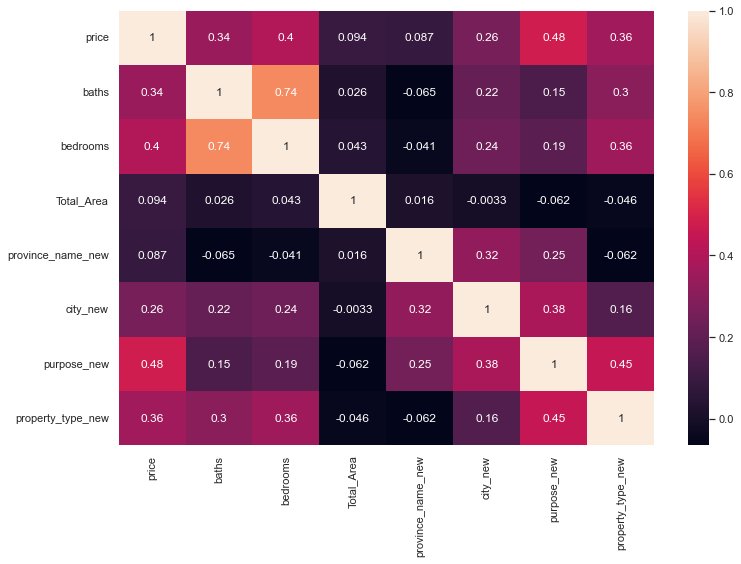

In [457]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(data_clean.corr(), annot=True, )


In [458]:
X = data_clean.drop(['price'], axis=1)
y = data_clean['price']

In [459]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)

In [471]:
print("Mean Squared Error = ",mean_squared_error(y_test, y_pred))
print("Accuracy = ",round(lin.score(X_test, y_test)*100, 0), "%")

Mean Squared Error =  230217057746852.56
Accuracy =  34.0 %
